In [14]:
### Benjamin Tollison ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy.solvers.pde import pdsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate, Function, Eq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)

In [15]:
# Problem 1
rp_minus = 7000 # km
ra_minus = 20000 # km
mu = 398600.435507 # km^3 s^-2
a_minus = (ra_minus + rp_minus) / 2
e_minus = (ra_minus-rp_minus) / (ra_minus+rp_minus)
va_minus = np.sqrt((mu/a_minus)*((1-e_minus)/(1+e_minus)))
rp_plus = rp_minus
ra_plus = ra_minus
a_plus = ra_minus
e_plus = 0
va_plus = np.sqrt(mu/a_plus)
displayEquations(symbols('\\Delta{V}'),(va_plus - va_minus)*10**3)

<IPython.core.display.Math object>

C:\Users\benja\AppData\Local\Temp\ipykernel_22388\596925805.py:16: RuntimeWarning: invalid value encountered in arccos
  f_positive = np.arccos((1/e_positive)*((a_positive/r_minus)*(1-e_positive**2)-1))
C:\Users\benja\AppData\Local\Temp\ipykernel_22388\596925805.py:18: RuntimeWarning: invalid value encountered in arccos
  f_positive = -np.arccos((1/e_positive)*((a_positive/r_minus)*(1-e_positive**2)-1))


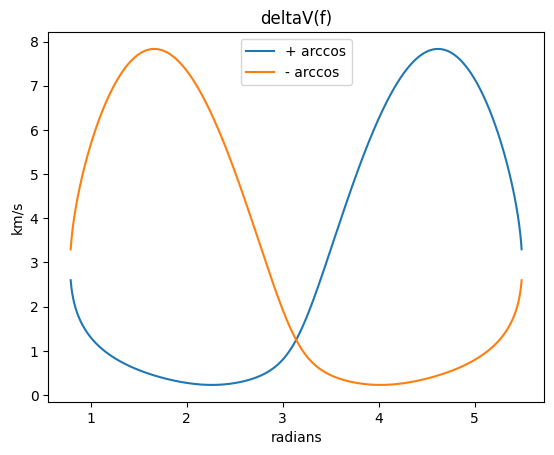

In [16]:
# Problem 2
delta_V_dict_pos = {'f':[],'delta_V_r':[],'delta_V_theta':[],'delta_V':[],'v+':[],'v-':[],'w+':[]}
delta_V_dict_neg = {'f':[],'delta_V_r':[],'delta_V_theta':[],'delta_V':[],'v+':[],'v-':[],'w+':[]}
def Transfer_function(rp_minus:float,ra_minus:float,omega_degrees:float,true_anomoly:float,a_positive:float,e_positive:float,positive_cos:bool)->None:
  f = true_anomoly
  omega = omega_degrees*np.pi/180
  a_minus = (ra_minus+rp_minus)/2
  e_minus = (ra_minus-rp_minus)/(ra_minus+rp_minus)
  p_minus = a_minus*(1-e_minus**2)
  h_minus = np.sqrt(mu*p_minus)
  v_minus = (h_minus/p_minus)*np.array([e_minus*np.sin(f),1+e_minus*np.cos(f)])
  r_minus = p_minus/(1+e_minus*np.cos(f))
  p_positive = a_positive*(1-e_positive**2)
  h_positive = np.sqrt(mu*p_positive)
  if positive_cos==True:
    f_positive = np.arccos((1/e_positive)*((a_positive/r_minus)*(1-e_positive**2)-1))
  elif positive_cos==False:
    f_positive = -np.arccos((1/e_positive)*((a_positive/r_minus)*(1-e_positive**2)-1))
  omega_positive = f + omega - f_positive
  v_positive = (h_positive/p_positive)*np.array([e_positive*np.sin(f_positive),1+e_positive*np.cos(f_positive)])
  delta_V_vector = v_positive - v_minus
  delta_V = np.linalg.norm(delta_V_vector)
  return true_anomoly,v_positive,v_minus,delta_V_vector,delta_V,omega_positive
true_anomoly_list = np.linspace(0,2*np.pi,1000)
for f in true_anomoly_list:
  solution = Transfer_function(7000,40000,268,f,26554,0.7,True)
  delta_V_dict_pos['f'].append(solution[0])
  delta_V_dict_pos['v+'].append(solution[1])
  delta_V_dict_pos['v-'].append(solution[2])
  delta_V_dict_pos['delta_V_r'].append(solution[3][0])
  delta_V_dict_pos['delta_V_theta'].append(solution[3][1])
  delta_V_dict_pos['delta_V'].append(solution[4])
  delta_V_dict_pos['w+'].append(solution[5]*180/np.pi)
  solution = Transfer_function(7000,40000,268,f,26554,0.7,False)
  delta_V_dict_neg['f'].append(solution[0])
  delta_V_dict_neg['v+'].append(solution[1])
  delta_V_dict_neg['v-'].append(solution[2])
  delta_V_dict_neg['delta_V_r'].append(solution[3][0])
  delta_V_dict_neg['delta_V_theta'].append(solution[3][1])
  delta_V_dict_neg['delta_V'].append(solution[4])
  delta_V_dict_neg['w+'].append(solution[5]*180/np.pi)
pd.DataFrame(delta_V_dict_pos).to_csv('delta_V_pos.csv')
pd.DataFrame(delta_V_dict_neg).to_csv('delta_V_neg.csv')
plt.plot(delta_V_dict_pos['f'],delta_V_dict_pos['delta_V'],label='+ arccos')
plt.plot(delta_V_dict_neg['f'],delta_V_dict_neg['delta_V'],label='- arccos')
plt.title('deltaV(f)')
plt.xlabel('radians')
plt.ylabel('km/s')
plt.legend()
plt.show()

In [17]:
delta_V_min = .5
f_min = 0
for index,dV in enumerate(delta_V_dict_pos['delta_V']):
  if dV <= delta_V_min:
    delta_V_min = dV
    f_min = delta_V_dict_pos['f'][index]
    omega_optimal_pos = delta_V_dict_pos['w+'][index]
print(delta_V_min)
displayEquations(symbols('f_{min}^+'),round(f_min*180/np.pi,0))
for index,dV in enumerate(delta_V_dict_neg['delta_V']):
  if dV <= delta_V_min:
    delta_V_min = dV
    f_min = delta_V_dict_pos['f'][index]
    omega_optimal_neg = delta_V_dict_neg['w+'][index]
displayEquations(symbols('f_{min}^-'),round(f_min*180/np.pi,0))
print(delta_V_min)

0.22871565151499643


<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.22871565151499537


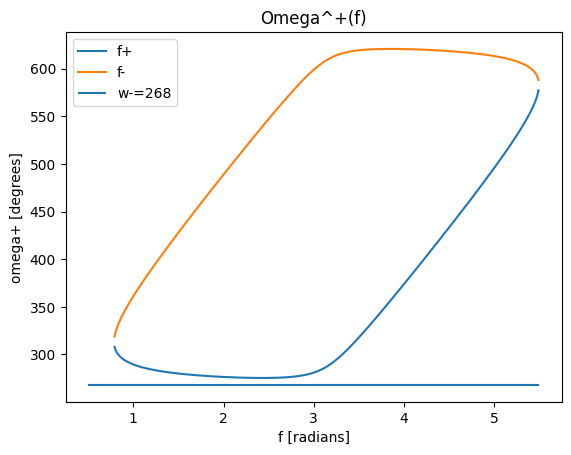

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [18]:
plt.plot(delta_V_dict_pos['f'],delta_V_dict_pos['w+'],label='f+')
plt.plot(delta_V_dict_neg['f'],delta_V_dict_neg['w+'],label='f-')
plt.hlines(268,.5,1.75*np.pi,label='w-=268')
plt.legend()
plt.title('Omega^+(f)')
plt.ylabel('omega+ [degrees]')
plt.xlabel('f [radians]')
plt.show()
displayEquations(symbols('\\omega^+_{optimal}'),omega_optimal_pos)
displayEquations(symbols('\\omega^+_{optimal}'),omega_optimal_neg)

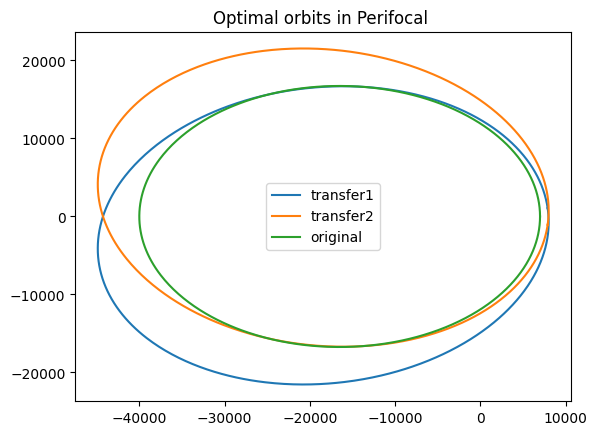

In [19]:
a_plus = 26554
e_plus = 0.7
rp_minus = 7000
ra_minus = 40000
omega_original = 268*np.pi/180
a_neg = (ra_minus+rp_minus)/2
e_neg = (ra_minus-rp_minus)/(ra_minus+rp_minus)
r_plus_orbit = lambda true_anomoly,omega_optimal: (a_plus*(1-e_plus**2))/(1+e_plus*np.cos(true_anomoly))*np.array([np.cos(true_anomoly+omega_optimal*np.pi/180-omega_original),np.sin(true_anomoly+omega_optimal*np.pi/180-omega_original)])
r_neg_orbit = lambda true_anomoly,omega: (a_neg*(1-e_neg**2))/(1+e_neg*np.cos(true_anomoly))*np.array([np.cos(true_anomoly),np.sin(true_anomoly)])
perifocal_plot = {'x1':[],'y1':[],'x2':[],'y2':[],'x0':[],'y0':[]}
for i in true_anomoly_list:
  perifocal_plot['x1'].append(r_plus_orbit(i,omega_optimal_pos)[0])
  perifocal_plot['y1'].append(r_plus_orbit(i,omega_optimal_pos)[1])
  perifocal_plot['x2'].append(r_plus_orbit(i,omega_optimal_neg)[0])
  perifocal_plot['y2'].append(r_plus_orbit(i,omega_optimal_neg)[1]) 
  perifocal_plot['x0'].append(r_neg_orbit(i,268)[0])
  perifocal_plot['y0'].append(r_neg_orbit(i,268)[1]) 
plt.plot(perifocal_plot['x1'],perifocal_plot['y1'],label='transfer1')
plt.plot(perifocal_plot['x2'],perifocal_plot['y2'],label='transfer2')
plt.plot(perifocal_plot['x0'],perifocal_plot['y0'],label='original')
plt.legend()
plt.title('Optimal orbits in Perifocal ')
plt.show()

In [20]:
# Problem 3
va_minus = lambda a,e: np.sqrt((mu/a)*((1-e)/(1+e)))
va_plus = lambda a,e: np.sqrt((mu/a)*((1-e)/(1+e)))
rp_1 = 6750 # km
ra_1 = 8900
rp_2 = 7000
ra_2 = 9500
a_function = lambda ra,rp: (ra+rp)/2
e_function = lambda ra,rp: (ra-rp)/(ra+rp)
delta_v1 = va_plus(a_function(ra_1,ra_1),e_function(ra_1,ra_1)) + va_minus(a_function(ra_1,rp_1),e_function(ra_1,rp_1))
delta_v2 = va_plus(a_function(ra_2,rp_2),e_function(ra_2,rp_2)) + va_minus(a_function(ra_1,ra_2),e_function(ra_1,ra_2))
delta_v = delta_v1 + delta_v2
displayEquations(symbols('\\Delta{V_{total}}'),delta_v)
displayEquations(symbols('\\Delta{V_{i}}'),2*va_plus(a_function(ra_2,rp_2),e_function(ra_2,rp_2))*np.sin(30*np.pi/180))

<IPython.core.display.Math object>

<IPython.core.display.Math object>